In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,5)

import seaborn as sns

In [2]:
# Read data

reactions = pd.read_csv('Reactions.csv')

reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [3]:
# Read data

content = pd.read_csv('Content.csv')

content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [5]:
# Read data

reaction_types = pd.read_csv('ReactionTypes.csv')

reaction_types.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [6]:
# Cleaning reactions table
# Dropping unwanted columns

reactions.drop(['Unnamed: 0', 'User ID'], inplace= True, axis= 1)

In [7]:
reactions.head()

,Content ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [8]:
# Cleaning reactions table
# Renaming Type column

reactions.rename(columns= {'Type': 'ReactionType'}, inplace= True)

In [9]:
reactions.head()

,Content ID,ReactionType,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [10]:
# Cleaning content table
# Dropping unwanted columns

content.drop(['Unnamed: 0', 'URL'], inplace= True, axis= 1)

In [11]:
# Cleaning content table
# Renaming Type column

content.rename(columns= {'Type': 'ContentType'}, inplace= True)

In [12]:
content.head()

,Content ID,User ID,ContentType,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food


In [13]:
# Cleaning reaction_types table
# Dropping unwanted columns

reaction_types.drop(['Unnamed: 0'], inplace= True, axis= 1)

In [14]:
# Cleaning reaction_types table
# Renaming Type column

reaction_types.rename(columns= {'Type': 'ReactionType'}, inplace= True)

In [15]:
reaction_types.head()

,ReactionType,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [16]:
# Merging files

df1 = pd.merge(content, reactions, how = 'left', on = ['Content ID'])

df1.head()

,Content ID,User ID,ContentType,Category,ReactionType,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,disgust,2021-01-06 19:13:01


In [17]:
# Merging files

df = pd.merge(df1, reaction_types, how = 'left', on = ['ReactionType'])

df.head()

,Content ID,User ID,ContentType,Category,ReactionType,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,NaN,2021-04-22 15:17:15,NaN,NaN
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,disgust,2020-11-07 09:43:50,negative,0.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,dislike,2021-06-17 12:22:51,negative,10.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,scared,2021-04-18 05:13:58,negative,15.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,disgust,2021-01-06 19:13:01,negative,0.0


In [18]:
#Finding number of null values for each column

df.isnull().sum()

Content ID         0
User ID            0
ContentType        0
Category           0
ReactionType    1000
Datetime          20
Sentiment       1000
Score           1000
dtype: int64

In [19]:
#Dropping rows with null values

df.dropna(axis= 0, how= 'any', inplace= True)

In [20]:
df.isnull().sum()

Content ID      0
User ID         0
ContentType     0
Category        0
ReactionType    0
Datetime        0
Sentiment       0
Score           0
dtype: int64

In [21]:
#Checking data types

df.dtypes

Content ID       object
User ID          object
ContentType      object
Category         object
ReactionType     object
Datetime         object
Sentiment        object
Score           float64
dtype: object

In [22]:
#Changing the data type of Score

df['Score'] = df['Score'].astype('int64')

In [23]:
#Changing the data type of Datetime

df['Datetime'] = df['Datetime'].astype('datetime64')

In [24]:
df.dtypes

Content ID              object
User ID                 object
ContentType             object
Category                object
ReactionType            object
Datetime        datetime64[ns]
Sentiment               object
Score                    int64
dtype: object

In [25]:
df['Month'] = df['Datetime'].dt.month

In [26]:
df.groupby('Month').count()['Score'].reset_index().sort_values('Score', ascending= False).head()

,Month,Score
4,5,2138
0,1,2126
7,8,2114
11,12,2092
6,7,2070


In [27]:
df['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', 'Culture', '"food"', 'Food',
       '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [28]:
df['Category']= df['Category'].replace('"', '', regex=True)
df['Category']= df['Category'].str.lower()

In [29]:
df['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [30]:
df['Category'].nunique()

16

In [31]:
df

,Content ID,User ID,ContentType,Category,ReactionType,Datetime,Sentiment,Score,Month
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,disgust,2020-11-07 09:43:50,negative,0,11
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,dislike,2021-06-17 12:22:51,negative,10,6
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,scared,2021-04-18 05:13:58,negative,15,4
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,disgust,2021-01-06 19:13:01,negative,0,1
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,interested,2020-08-23 12:25:58,positive,30,8
...,...,...,...,...,...,...,...,...,...
25568,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,dislike,2020-06-27 09:46:48,negative,10,6
25569,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,intrigued,2021-02-16 17:17:02,positive,45,2
25570,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,interested,2020-09-12 03:54:58,positive,30,9
25571,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,worried,2020-11-04 20:08:31,negative,12,11


In [32]:
df.to_csv('data_for_analysis.csv', index= False)

In [33]:
cat_score = df.groupby('Category').sum()['Score'].reset_index().sort_values('Score', ascending= False).head()

cat_score

,Category,Score
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676


In [34]:
cat_reactype = df.groupby('Category').count()['ReactionType'].reset_index().sort_values('ReactionType', ascending= False).head()

cat_reactype

,Category,ReactionType
0,animals,1897
9,science,1796
7,healthy eating,1717
6,food,1699
12,technology,1698


In [35]:
sns.set_style('darkgrid')

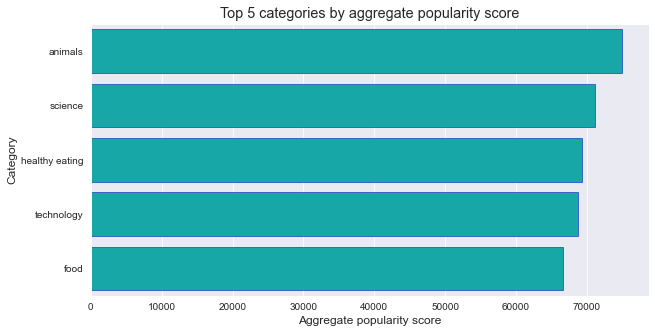

<Figure size 720x360 with 0 Axes>

In [36]:
fig = sns.barplot(x= 'Score', y= 'Category', data= cat_score, color = 'c', edgecolor= 'mediumblue').set(title= 'Top 5 categories by aggregate popularity score') 

plt.xlabel('Aggregate popularity score')
plt.ylabel('Category')

plt.show(fig)
plt.savefig('Top5.png', bbox_inches= 'tight')

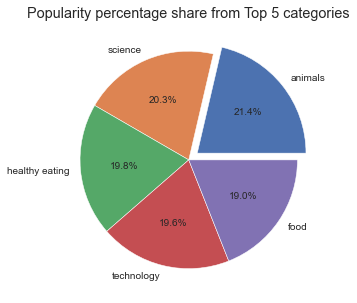

In [37]:
data= cat_score['Score']
keys= cat_score['Category']
explode= [0.1, 0, 0, 0, 0]

colors= sns.color_palette('deep')
plt.pie(data, labels= keys, colors= colors, explode= explode, autopct= '%.1f%%')

plt.title('Popularity percentage share from Top 5 categories')
plt.show()